## How do distributions transform under a change of variables ?

Kyle Cranmer, March 2016

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


We are interested in understanding how distributions transofrm under a change of variables.
Let's start with a simple example. Think of a spinner like on a game of twister. 

<img src="http://cdn.krrb.com/post_images/photos/000/273/858/DSCN3718_large.jpg?1393271975" width=300 />

We flick the spinner and it stops. Let's call the angle of the pointer $x$. It seems a safe assumption that the distribution of $x$ is uniform between $[0,2\pi)$... so $p_x(x) = 1/\sqrt{2\pi}$

Now let's say that we change variables to $y=\cos(x)$ (sorry if the names are confusing here, don't think about x- and y-coordinates, these are just names for generic variables).  The question is this:
** what is the distribution of y?**  Let's call it $p_y(y)$

Well it's easy to do with a simulation, let's try it out

In [2]:
# generate samples for x, evaluate y=cos(x)
n_samples = 100000
x = np.random.uniform(0,2*np.pi,n_samples)
y = np.cos(x)

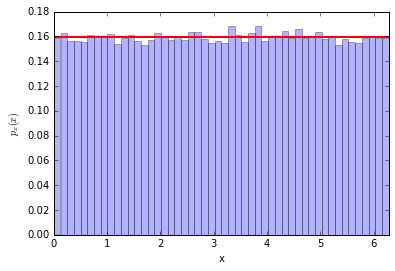

In [3]:
# make a histogram of x
n_bins = 50
counts, bins, patches = plt.hist(x, bins=50, normed=True, alpha=0.3)
plt.plot([0,2*np.pi], (1./2/np.pi, 1./2/np.pi), lw=2, c='r')
plt.xlim(0,2*np.pi)
plt.xlabel('x')
plt.ylabel('$p_x(x)$')

Ok, now let's make a histogram for $y=\cos(x)$

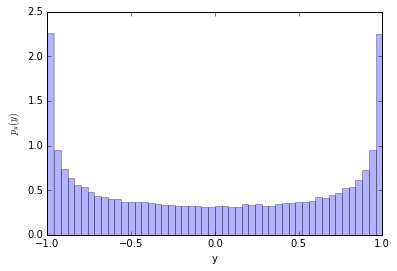

In [4]:
counts, y_bins, patches = plt.hist(y, bins=50, normed=True, alpha=0.3)
plt.xlabel('y')
plt.ylabel('$p_y(y)$')

It's not uniform! Why is that?  Let's look at the $x-y$ relationship

(-1, 7)

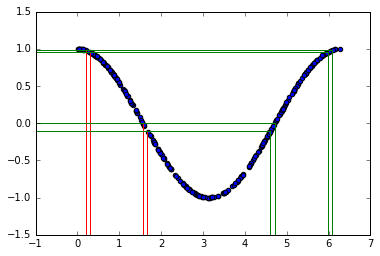

In [5]:
# make a scatter of x,y
plt.scatter(x[:300],y[:300]) #just the first 300 points

xtest = .2
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='r')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='r')
xtest = xtest+.1
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='r')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='r')

xtest = 2*np.pi-xtest
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='g')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='g')
xtest = xtest+.1
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='g')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='g')


xtest = np.pi/2
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='r')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='r')
xtest = xtest+.1
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='r')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='r')

xtest = 2*np.pi-xtest
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='g')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='g')
xtest = xtest+.1
plt.plot((-1,xtest),(np.cos(xtest),np.cos(xtest)), c='g')
plt.plot((xtest,xtest),(-1.5,np.cos(xtest)), c='g')


plt.ylim(-1.5,1.5)
plt.xlim(-1,7)

The two sets of vertical lines are both separated by $0.1$. The probability  $P(a < x < b)$ must equal the probability of $P( cos(b) < y < cos(a) )$. In this example there are two different values of $x$ that give the same $y$ (see green and red lines), so we need to take that into account. For now, let's just focus on the first part of the curve with $x<\pi$.

So we can write (this is the important equation):

\begin{equation}
\int_a^b p_x(x) dx = \int_{\cos(b)}^{\cos(a)} p_y(y) dy 
\end{equation}

and we can re-write the integral on the right by using a change of variables (pure calculus)

\begin{equation}
\int_a^b p_x(x) dx = \int_{\cos(b)}^{\cos(a)} p_y(y) dy = \int_a^b p_y(y(x))  \left| \frac{dy}{dx}\right| dx 
\end{equation}

notice that the limits of integration and integration variable are the same for the left and right sides of the equation, so the integrands must be the same too. Therefore:

\begin{equation}
p_x(x) = p_y(y)  \left| \frac{dy}{dx}\right| 
\end{equation}
and equivalently
\begin{equation}
p_y(y) = p_x(x) \,/ \,\left| \, {dy}/{dx}\, \right | 
\end{equation}

The factor $\left|\frac{dy}{dx} \right|$ is called a Jacobian. When it is large it is stretching the probability in $x$ over a large range of $y$, so it makes sense that it is in the denominator.

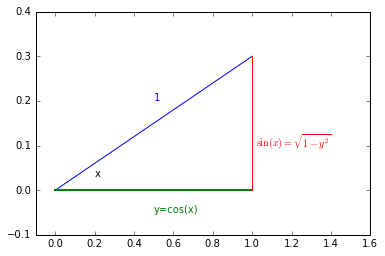

In [6]:
plt.plot((0.,1), (0,.3))
plt.plot((0.,1), (0,0), lw=2)
plt.plot((1.,1), (0,.3))
plt.ylim(-.1,.4)
plt.xlim(-.1,1.6)
plt.text(0.5,0.2, '1', color='b')
plt.text(0.2,0.03, 'x', color='black')
plt.text(0.5,-0.05, 'y=cos(x)', color='g')
plt.text(1.02,0.1, '$\sin(x)=\sqrt{1-y^2}$', color='r')

In our case:
\begin{equation}
\left|\frac{dy}{dx} \right| =  \sin(x)
\end{equation}

Looking at the right-triangle above you can see $\sin(x)=\sqrt{1-y^2}$ and finally there will be an extra factor of 2 for $p_y(y)$ to take into account $x>\pi$. So we arrive at
\begin{equation}
p_y(y) = 2 \times \frac{1}{2 \pi} \frac{1}{\sin(x)} = \frac{1}{\pi} \frac{1}{\sin(\arccos(y))} = \frac{1}{\pi} \frac{1}{\sqrt{1-y^2}}
\end{equation}

  Notice that when $y=\pm 1$ the pdf is diverging. This is called a [caustic](http://www.phikwadraat.nl/huygens_cusp_of_tea/) and you see them in your coffee and rainbows!

|   |   |
|---|---|
|  <img src="http://www.nanowerk.com/spotlight/id19915_1.jpg" size=200 /> | <img src="http://www.ams.org/featurecolumn/images/february2009/caustic.gif" size=200>  | 


**Let's check our prediction**

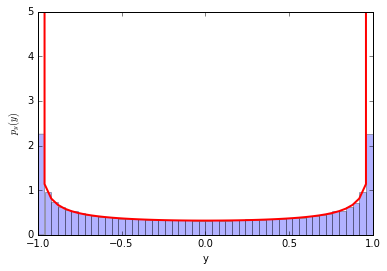

In [7]:
counts, y_bins, patches = plt.hist(y, bins=50, normed=True, alpha=0.3)
pdf_y = (1./np.pi)/np.sqrt(1.-y_bins**2)
plt.plot(y_bins, pdf_y, c='r', lw=2)
plt.ylim(0,5)
plt.xlabel('y')
plt.ylabel('$p_y(y)$')

Perfect!

## A trick using the cumulative distribution function (cdf) to generate random numbers

Let's consider a different variable transformation now -- it is a special one that we can use to our advantage. 
\begin{equation}
y(x) = \textrm{cdf}(x) = \int_{-\infty}^x p_x(x') dx'
\end{equation}

Here's a plot of a distribution and cdf for a Gaussian.

(NOte: the axes are different for the pdf and the cdf http://matplotlib.org/examples/api/two_scales.html

In [8]:
from scipy.stats import norm

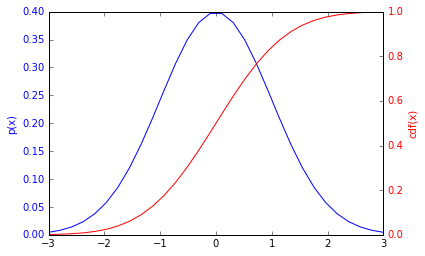

In [9]:
x_for_plot = np.linspace(-3,3, 30)
fig, ax1 = plt.subplots()

ax1.plot(x_for_plot, norm.pdf(x_for_plot), c='b')
ax1.set_ylabel('p(x)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(x_for_plot, norm.cdf(x_for_plot), c='r')
ax2.set_ylabel('cdf(x)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

Ok, so let's use our result about how distributions transform under a change of variables to predict the distribution of $y=cdf(x)$. We need to calculate 

\begin{equation}
\frac{dy}{dx} = \frac{d}{dx} \int_{-\infty}^x p_x(x') dx'
\end{equation}

Just like particles and anti-particles, when derivatives meet anti-derivatives they annihilate. So $\frac{dy}{dx} = p_x(x)$, which shouldn't be a surprise.. the slope of the cdf is the pdf.

So putting these together we find the distribution for $y$ is:

\begin{equation}
p_y(y) = p_x(x) \, / \, \frac{dy}{dx} = p_x(x) /p_x(x) = 1
\end{equation}

So it's just a uniform distribution from $[0,1]$, which is perfect for random numbers.

We can turn this around and generate a uniformly random number between $[0,1]$, take the inverse of the cdf and we should have the distribution we want for $x$.

Let's try it for a Gaussian. The inverse of the cdf for a Gaussian is called [ppf](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.norm.html)


In [10]:
norm.ppf.__doc__

'\n        Percent point function (inverse of `cdf`) at q of the given RV.\n\n        Parameters\n        ----------\n        q : array_like\n            lower tail probability\n        arg1, arg2, arg3,... : array_like\n            The shape parameter(s) for the distribution (see docstring of the\n            instance object for more information)\n        loc : array_like, optional\n            location parameter (default=0)\n        scale : array_like, optional\n            scale parameter (default=1)\n\n        Returns\n        -------\n        x : array_like\n            quantile corresponding to the lower tail probability q.\n\n        '

In [11]:
#check it out
norm.cdf(0), norm.ppf(0.5)

(0.5, 0.0)

Ok, let's use CDF trick to generate Normally-distributed (aka Gaussian-distributed) random numbers

In [12]:
rand_cdf = np.random.uniform(0,1,10000)
rand_norm = norm.ppf(rand_cdf)

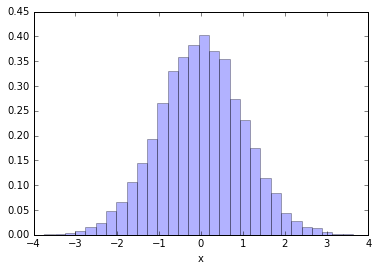

In [13]:
_ = plt.hist(rand_norm, bins=30, normed=True, alpha=0.3)
plt.xlabel('x')

**Pros**: The great thing about this technique is it is very efficient. You only generate one random number per random $x$.

**Cons**: the downside is you need to know how to compute the inverse cdf for $p_x(x)$ and that can be difficult. It works for a distribution like a Gaussian, but for some random distribution this might be even more computationally expensive than the accept/reject approach. This approach also doesn't really work if your distribution is for more than one variable.

## Going full circle

Ok, let's try it for our distribution of $y=\cos(x)$ above.  We found 

\begin{equation}
p_y(y) = \frac{1}{\pi} \frac{1}{\sqrt{1-y^2}}
\end{equation}

So the CDF is  (see Wolfram alpha for [integral](http://www.wolframalpha.com/input/?i=integrate%5B1%2Fsqrt%5B1-x%5E2%5D%2FPi%5D) )
\begin{equation}
cdf(y') = \int_{-1}^{y'} \frac{1}{\pi} \frac{1}{\sqrt{1-y^2}} = \frac{1}{\pi}\arcsin(y') + C
\end{equation}
and we know that for $y=-1$ the CDF must be 0, so the constant is $1/2$ and by looking at the plot or remembering some trig you know that it's also $cdf(y') = (1/\pi) \arccos(y')$.

So to apply the trick, we need to generate uniformly random variables $z$ between 0 and 1, and then take the inverse of the cdf to get $y$. Ok, so what would that be:
\begin{equation}
y = \textrm{cdf}^{-1}(z) = \cos(\pi z)
\end{equation}

**Of course!** that's how we started in the first place, we started with a uniform $x$ in $[0,2\pi]$ and then defined $y=\cos(x)$. So we just worked backwards to get where we started.  The only difference here is that we only evaluate the first half: $\cos(x < \pi)$




